# EddyPro data 2022-01-28

In [692]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patheffects as path_effects

## Prepare Dataframes

In [693]:
#Customize loaded data

df = pd.read_csv('eddypro_FdP_full_output_2022-01-28T073241_adv.csv',   
                   sep=';',           #semicolon value file
                   usecols=[1,2,3,4,10,11,13,14,16,17,19,20,22,23,58,59,60,64,69,78,80,84,88,162],   #only load the specified columns
                   parse_dates=[0],     # Intepret the 1st column as a date
                   skiprows=[0,2,3],         #skip the 3rd row of the file
                   na_values=['NaN'],       #take any 'NaN' as missing values
                   #dtype={"qc_H":int},"qc_LE":int},             #parse the salary column as an integer
                   #MORE KEYWORDS
                   #quotechar="'",        #single quote allowed as quote character
                   
)
df.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,co2_flux,qc_co2_flux,...,sonic_temperature,air_temperature,air_pressure,ET,RH,wind_speed,wind_dir,u*,bowen_ratio,mean_value_LI-7500
0,2022-01-13,13:30,135.624,1,272.445,0,222.388,0.0,0.009591,0.0,...,284.182,284.182,97637.5,0.323247,540.826,812.881,345.116,0.392941,0.122509,56
1,2022-01-13,14:00,135.832,1,268.186,0,216.003,0.0,-0.100766,0.0,...,284.291,284.291,97635.1,0.313998,529.441,739.151,348.345,0.344556,0.124159,56
2,2022-01-13,14:30,136.040,1,252.837,0,232.459,0.0,-0.096929,0.0,...,284.404,284.404,97629.4,0.337957,485.925,737.763,344.195,0.322162,0.108766,56
3,2022-01-13,15:00,136.249,1,170.559,0,205.230,0.0,0.065177,0.0,...,284.253,284.253,97633.3,0.298327,489.165,801.950,350.759,0.374732,0.083106,56
4,2022-01-13,15:30,136.457,1,775.454,0,201.503,0.0,-0.053430,0.0,...,284.216,284.216,97638.9,0.292898,488.823,658.150,343.779,0.308789,0.038484,56


Separate Energy and Flux data:

In [694]:
#Rearrange columns to exctract 2 dataframes
cols = list(df.columns.values)

#ENERGY DATA
dfE = df[cols[0:8]+cols[14:19]+[cols[-2]]]
dfE.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,air_pressure,ET,RH,bowen_ratio
0,2022-01-13,13:30,135.624,1,272.445,0,222.388,0.0,284.182,284.182,97637.5,0.323247,540.826,0.122509
1,2022-01-13,14:00,135.832,1,268.186,0,216.003,0.0,284.291,284.291,97635.1,0.313998,529.441,0.124159
2,2022-01-13,14:30,136.040,1,252.837,0,232.459,0.0,284.404,284.404,97629.4,0.337957,485.925,0.108766
3,2022-01-13,15:00,136.249,1,170.559,0,205.230,0.0,284.253,284.253,97633.3,0.298327,489.165,0.083106
4,2022-01-13,15:30,136.457,1,775.454,0,201.503,0.0,284.216,284.216,97638.9,0.292898,488.823,0.038484


In [695]:
rn = pd.read_csv('CR1000XLagunaPiedra_flux_261121.dat',   
                   sep=',',           #semicolon value file
                   usecols=['TIMESTAMP','Rn_meas_Avg'],   #only load the specified columns
                   parse_dates=[0],     # Intepret the 1st column as a date
                   skiprows=[*[0,2,3], *[i for i in range(4,7343)]],         #skip the 3rd row of the file
                   na_values=['NaN'],       #take any 'NaN' as missing values
                   #dtype={"qc_H":int},"qc_LE":int},             #parse the salary column as an integer
                   #MORE KEYWORDS
                   #quotechar="'",        #single quote allowed as quote character
)
rn.head()

,TIMESTAMP,Rn_meas_Avg
0,2022-01-13 13:30:00,125.5275
1,2022-01-13 14:00:00,121.6787
2,2022-01-13 14:30:00,126.7261
3,2022-01-13 15:00:00,114.8132
4,2022-01-13 15:30:00,102.1844


In [696]:
dfE = pd.concat([dfE, rn],axis=1)
dfE.head()

,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,air_pressure,ET,RH,bowen_ratio,TIMESTAMP,Rn_meas_Avg
0,2022-01-13,13:30,135.624,1,272.445,0,222.388,0.0,284.182,284.182,97637.5,0.323247,540.826,0.122509,2022-01-13 13:30:00,125.5275
1,2022-01-13,14:00,135.832,1,268.186,0,216.003,0.0,284.291,284.291,97635.1,0.313998,529.441,0.124159,2022-01-13 14:00:00,121.6787
2,2022-01-13,14:30,136.040,1,252.837,0,232.459,0.0,284.404,284.404,97629.4,0.337957,485.925,0.108766,2022-01-13 14:30:00,126.7261
3,2022-01-13,15:00,136.249,1,170.559,0,205.230,0.0,284.253,284.253,97633.3,0.298327,489.165,0.083106,2022-01-13 15:00:00,114.8132
4,2022-01-13,15:30,136.457,1,775.454,0,201.503,0.0,284.216,284.216,97638.9,0.292898,488.823,0.038484,2022-01-13 15:30:00,102.1844


In [697]:
#FLUX DATA 
dfF = df[cols[0:4]+cols[8:14]+cols[19:22]+[cols[-1]]] #get flux relevant data
dfF.head()

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
0,2022-01-13,13:30,135.624,1,0.009591,0.0,498.837,0.0,-0.011480,0.0,812.881,345.116,0.392941,56
1,2022-01-13,14:00,135.832,1,-0.100766,0.0,484.565,0.0,-0.006856,0.0,739.151,348.345,0.344556,56
2,2022-01-13,14:30,136.040,1,-0.096929,0.0,521.538,0.0,-0.006126,0.0,737.763,344.195,0.322162,56
3,2022-01-13,15:00,136.249,1,0.065177,0.0,460.382,0.0,-0.005243,0.0,801.950,350.759,0.374732,56
4,2022-01-13,15:30,136.457,1,-0.053430,0.0,452.004,0.0,-0.006277,0.0,658.150,343.779,0.308789,56


## Plot and Compare Data

### Energy Balance Data

In [698]:
print(dfE.shape)

#Daytime
dfE_day = dfE[dfE['daytime']==1]
print(dfE_day.shape)
dfE_day.head()

(670, 16)
(292, 16)


,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,air_pressure,ET,RH,bowen_ratio,TIMESTAMP,Rn_meas_Avg
0,2022-01-13,13:30,135.624,1,272.445,0,222.388,0.0,284.182,284.182,97637.5,0.323247,540.826,0.122509,2022-01-13 13:30:00,125.5275
1,2022-01-13,14:00,135.832,1,268.186,0,216.003,0.0,284.291,284.291,97635.1,0.313998,529.441,0.124159,2022-01-13 14:00:00,121.6787
2,2022-01-13,14:30,136.040,1,252.837,0,232.459,0.0,284.404,284.404,97629.4,0.337957,485.925,0.108766,2022-01-13 14:30:00,126.7261
3,2022-01-13,15:00,136.249,1,170.559,0,205.230,0.0,284.253,284.253,97633.3,0.298327,489.165,0.083106,2022-01-13 15:00:00,114.8132
4,2022-01-13,15:30,136.457,1,775.454,0,201.503,0.0,284.216,284.216,97638.9,0.292898,488.823,0.038484,2022-01-13 15:30:00,102.1844


In [699]:
#Nighttime
dfE_night = dfE[dfE['daytime']==0]
print(dfE_night.shape)
dfE_night.head()

(378, 16)


,date,time,DOY,daytime,H,qc_H,LE,qc_LE,sonic_temperature,air_temperature,air_pressure,ET,RH,bowen_ratio,TIMESTAMP,Rn_meas_Avg
9,2022-01-13,18:00,137.498,0,-126.969,0,298.056,0.0,282.271,282.271,97729.0,0.043244,764.241,-0.425990,2022-01-13 18:00:00,-42.60743
10,2022-01-13,18:30,137.707,0,-138.582,0,209.269,0.0,281.921,281.921,97737.5,0.030352,789.083,-0.662221,2022-01-13 18:30:00,-38.71605
11,2022-01-13,19:00,137.915,0,-160.598,0,177.987,0.0,281.890,281.890,97745.8,0.025814,785.588,-0.902300,2022-01-13 19:00:00,-36.36525
12,2022-01-13,19:30,138.123,0,-252.036,0,167.926,0.0,281.967,281.967,97741.3,0.024357,802.039,-150.088000,2022-01-13 19:30:00,-35.60099
13,2022-01-13,20:00,138.332,0,-176.894,0,117.754,0.0,281.924,281.924,97742.9,0.017079,812.456,-150.223000,2022-01-13 20:00:00,-32.80743


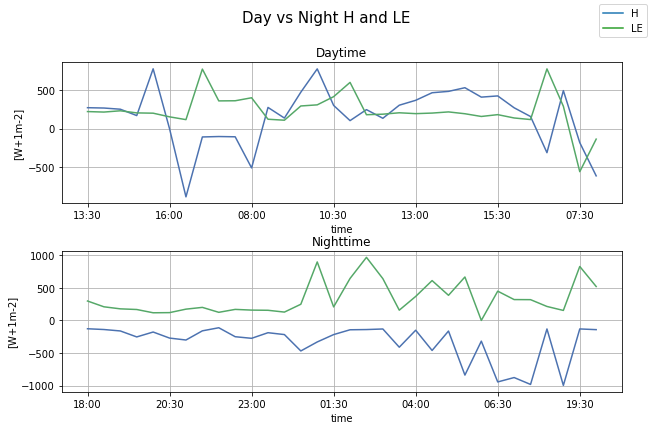

In [709]:
fig, ax = plt.subplots(2,1)
fig.suptitle('Day vs Night H and LE',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfE_day[0:32].plot(kind='line',x='time',y=['H','LE'],ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=False,title='Daytime')
ax2 = plt.subplot(212)
dfE_night[0:32].plot(kind='line',x='time',y=['H','LE'],ax=ax2,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=False,title='Nighttime')

#Create a customizable legend --> idk 
lineH = mlines.Line2D([], [], color='tab:blue', markersize=3, label='H')
lineLE = mlines.Line2D([], [], color='tab:green', markersize=3, label='LE')
fig.legend(handles=[lineH, lineLE]);

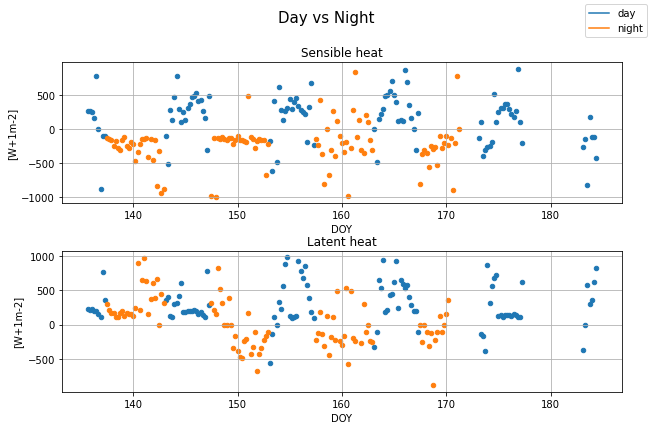

In [701]:
fig, ax = plt.subplots(2)
fig.suptitle('Day vs Night',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
plt.title('Sensible heat')
dfE_day[0:100].plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfE_night[0:100].plot(kind='scatter',x='DOY',y='H',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')

ax2 = plt.subplot(212)
plt.title('Latent heat')
dfE_day[0:100].plot(kind='scatter',x='DOY',y='LE',ax=ax2,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:blue')
dfE_night[0:100].plot(kind='scatter',x='DOY',y='LE',ax=ax2,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=True,color='tab:orange')

#Create a customizable legend
day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
fig.legend(handles=[day, night]);

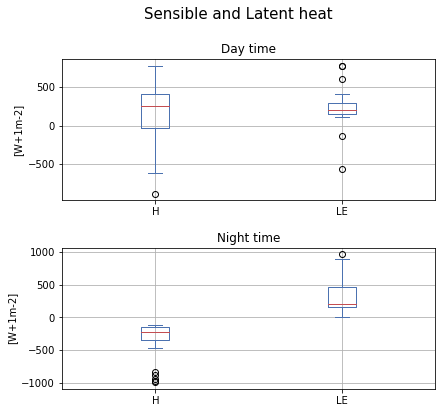

In [702]:
fig, ax = plt.subplots(2,1)
fig.suptitle('Sensible and Latent heat',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfE_day[0:32].plot(kind='box',y=['H','LE'],ax=ax1,
             figsize=(6,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=False,title='Day time')
ax2 = plt.subplot(212)
dfE_night[0:32].plot(kind='box',y=['H','LE'],ax=ax2,
             figsize=(6,6),grid=True,#xlim=(0,35),
             ylabel='[W+1m-2]',legend=False,title='Night time');

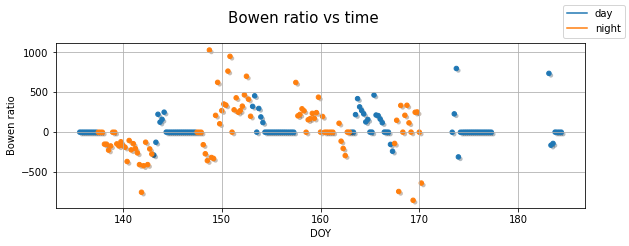

In [703]:
fig, ax = plt.subplots(figsize=(4,6))
fig.suptitle('Bowen ratio vs time',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfE_day[0:100].plot(kind='scatter',x='DOY',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='Bowen ratio',legend=True,color='tab:blue',
             path_effects=[path_effects.SimplePatchShadow(), path_effects.Normal()])
dfE_night[0:100].plot(kind='scatter',x='DOY',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='Bowen ratio',legend=True,color='tab:orange',
             path_effects=[path_effects.SimplePatchShadow(), path_effects.Normal()])

#Create a customizable legend
day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
fig.legend(handles=[day, night]);

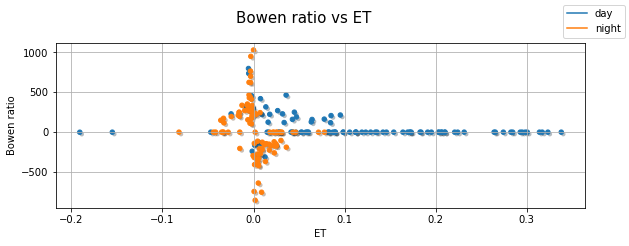

In [704]:
fig, ax = plt.subplots(figsize=(4,6))
fig.suptitle('Bowen ratio vs ET',size=15)
plt.tight_layout()

ax1 = plt.subplot(211)
dfE_day[0:100].plot(kind='scatter',x='ET',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='Bowen ratio',legend=True,color='tab:blue',
             path_effects=[path_effects.SimplePatchShadow(), path_effects.Normal()])
dfE_night[0:100].plot(kind='scatter',x='ET',y='bowen_ratio',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='Bowen ratio',legend=True,color='tab:orange',
             path_effects=[path_effects.SimplePatchShadow(), path_effects.Normal()])

#Create a customizable legend
day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
fig.legend(handles=[day, night]);

#### Surface Energy Balance

In progress ...

In [711]:
#dfE['Available energy'] = dfE['Rn_meas_Avg'] + dfE['']


### Flux Data

Separate gases:

In [434]:
print(dfF.shape)
dfF_co2 = dfF.loc[(dfF['mean_value_LI-7500']==56) & (dfF['qc_co2_flux']==0)]
print(dfF_co2.shape)

print(dfF.shape)
dfF_h2o = dfF.loc[df['qc_h2o_flux']==0]
print(dfF_h2o.shape)

print(dfF.shape)
dfF_ch4 = dfF.loc[dfF['qc_ch4_flux']==0]
print(dfF_ch4.shape) #SMALL SUBSET!!!

(670, 14)
(314, 14)
(670, 14)
(319, 14)
(670, 14)
(55, 14)


In [435]:
dfF_co2.head()

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
0,2022-01-13,13:30,135.624,1,0.009591,0.0,498.837,0.0,-0.011480,0.0,812.881,345.116,0.392941,56
1,2022-01-13,14:00,135.832,1,-0.100766,0.0,484.565,0.0,-0.006856,0.0,739.151,348.345,0.344556,56
2,2022-01-13,14:30,136.040,1,-0.096929,0.0,521.538,0.0,-0.006126,0.0,737.763,344.195,0.322162,56
3,2022-01-13,15:00,136.249,1,0.065177,0.0,460.382,0.0,-0.005243,0.0,801.950,350.759,0.374732,56
4,2022-01-13,15:30,136.457,1,-0.053430,0.0,452.004,0.0,-0.006277,0.0,658.150,343.779,0.308789,56


## Plots for comparison

### CO2 flux

X AXIS NOT GOOD! 
> should be hours in a day, day of year, what best to use?

#### Canopy vs Lake:

Separate wind directions:

In [436]:
#Wind from the lake
dfF_co2_lake = dfF_co2.loc[(dfF_co2['wind_dir']>=90) & (dfF_co2['wind_dir']<=270)]
print(dfF_co2_lake.shape)
dfF_co2_lake.head()

(73, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
7,2022-01-13,17:00,137.082,1,-0.051334,0.0,172.921000,0.0,-0.001088,0.0,637.989000,162.746,0.264545,56
12,2022-01-13,19:30,138.123,0,0.056118,0.0,0.375876,0.0,0.003145,0.0,644.445000,205.017,0.262910,56
40,2022-01-14,09:30,143.957,1,-0.602506,0.0,0.659172,0.0,0.000588,0.0,102.248000,266.062,0.092611,56
41,2022-01-14,10:00,144.166,1,-156.489000,0.0,0.692215,0.0,-0.009189,0.0,0.903268,267.574,0.040913,56
48,2022-01-14,13:30,145.624,1,-0.128143,0.0,455.405000,0.0,-0.004940,0.0,821.789000,105.213,0.423639,56


In [437]:
#Wind from the canopy
dfF_co2_canopy = dfF_co2.loc[~((dfF_co2['wind_dir']>=90) & (dfF_co2['wind_dir']<=270))]
print(dfF_co2_canopy.shape)

(241, 14)


If rows not specified (e.g. ``[0:37]``), fluxes are averaged for every common time of day ?? --> NO THEY ARE NOT, just random values on axes but shows all data.
Could cluster and represent main average data !

,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
0,2022-01-13,13:30,135.624,1,0.009591,0.0,498.837,0.0,-0.011480,0.0,812.881,345.116,0.392941,56
1,2022-01-13,14:00,135.832,1,-0.100766,0.0,484.565,0.0,-0.006856,0.0,739.151,348.345,0.344556,56
2,2022-01-13,14:30,136.040,1,-0.096929,0.0,521.538,0.0,-0.006126,0.0,737.763,344.195,0.322162,56
3,2022-01-13,15:00,136.249,1,0.065177,0.0,460.382,0.0,-0.005243,0.0,801.950,350.759,0.374732,56
4,2022-01-13,15:30,136.457,1,-0.053430,0.0,452.004,0.0,-0.006277,0.0,658.150,343.779,0.308789,56


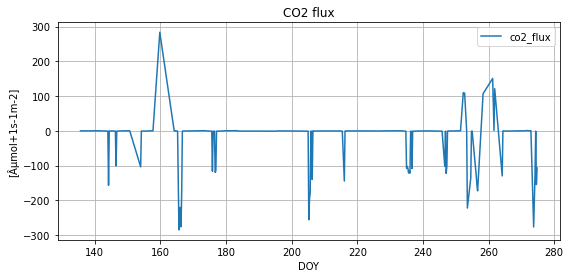

In [459]:
fig, ax = plt.subplots()
dfF_co2.plot(kind='line',x='DOY',y=['co2_flux'],ax=ax, 
             figsize=(9,4),grid=True,#xlim=(135,174), #SET X AXIS LIMITS
             title="CO2 flux",ylabel='[Âµmol+1s-1m-2]');

dfF_co2.head()

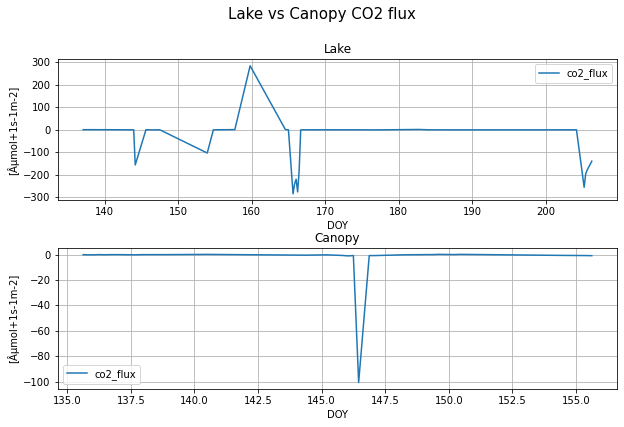

In [534]:
fig, ax = plt.subplots(2, 1)
fig.suptitle('Lake vs Canopy CO2 flux',size=15)
plt.tight_layout()

ax = plt.subplot(211)
dfF_co2_lake[0:37].plot(kind='line',x='DOY',y=['co2_flux'],ax=ax, 
             figsize=(9,6),grid=True,#xlim=(0,35), rot=0,
             title="Lake",ylabel='[Âµmol+1s-1m-2]')

ax = plt.subplot(212)
dfF_co2_canopy[0:37].plot(kind='line',x='DOY',y=['co2_flux'],ax=ax,
             figsize=(9,6),grid=True,#xlim=(0,35),
             title="Canopy",ylabel='[Âµmol+1s-1m-2]');

!!!CHECK WITH ``xlim`` within plotting code

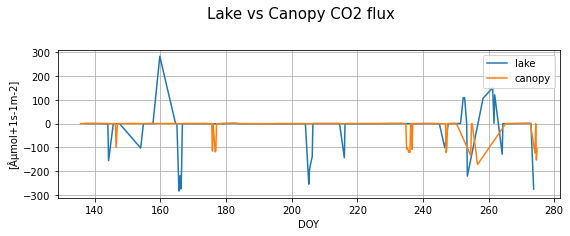

In [482]:
fig, ax = plt.subplots()
fig.suptitle('Lake vs Canopy CO2 flux',size=15)

ax1 = plt.subplot(211)
dfF_co2_lake.plot(kind='line',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[Âµmol+1s-1m-2]',legend=False)
dfF_co2_canopy.plot(kind='line',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[Âµmol+1s-1m-2]',legend=False)

#Create a customizable legend
lake = mlines.Line2D([], [], color='tab:blue', markersize=3, label='lake')
canopy = mlines.Line2D([], [], color='tab:orange', markersize=3, label='canopy')
ax1.legend(handles=[lake, canopy]);

Compute statistics and show as boxplot:

In [483]:
stats_lake = pd.DataFrame(dfF_co2_lake['co2_flux'].describe()).rename(columns={"co2_flux": "lake"})
stats_lake
stats_canopy = pd.DataFrame(dfF_co2_canopy['co2_flux'].describe()).rename(columns={"co2_flux": "canopy"})
statistics = pd.concat([stats_lake, stats_canopy],axis=1)
statistics

,lake,canopy
count,73.000000,241.000000
mean,-29.273607,-10.298106
std,102.941194,34.098223
min,-284.866000,-172.587000
25%,-0.934670,-0.647944
50%,-0.544509,-0.151962
75%,-0.051334,0.067632
max,283.627000,0.876805


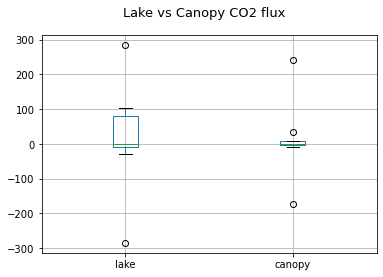

In [487]:
fig, ax = plt.subplots()
fig.suptitle('Lake vs Canopy CO2 flux',size=13)
boxplot = statistics.boxplot(column=['lake','canopy'],ax=ax,fontsize=10, 
                             rot=0, grid=True, figsize=None,layout=None)

#### Day vs Night 

In [488]:
#Daytime
dfF_co2_day = dfF_co2.loc[dfF_co2['daytime']==1]
print(dfF_co2_day.shape)
dfF_co2_lake.head()

(173, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
7,2022-01-13,17:00,137.082,1,-0.051334,0.0,172.921000,0.0,-0.001088,0.0,637.989000,162.746,0.264545,56
12,2022-01-13,19:30,138.123,0,0.056118,0.0,0.375876,0.0,0.003145,0.0,644.445000,205.017,0.262910,56
40,2022-01-14,09:30,143.957,1,-0.602506,0.0,0.659172,0.0,0.000588,0.0,102.248000,266.062,0.092611,56
41,2022-01-14,10:00,144.166,1,-156.489000,0.0,0.692215,0.0,-0.009189,0.0,0.903268,267.574,0.040913,56
48,2022-01-14,13:30,145.624,1,-0.128143,0.0,455.405000,0.0,-0.004940,0.0,821.789000,105.213,0.423639,56


In [489]:
dfF_co2_night = dfF_co2.loc[dfF_co2['daytime']==0]
print(dfF_co2_night.shape)
dfF_co2_night.head()

(141, 14)


,date,time,DOY,daytime,co2_flux,qc_co2_flux,h2o_flux,qc_h2o_flux,ch4_flux,qc_ch4_flux,wind_speed,wind_dir,u*,mean_value_LI-7500
10,2022-01-13,18:30,137.707,0,-0.089966,0.0,0.468395,0.0,0.002900,0.0,530.096,354.526,0.191917,56
11,2022-01-13,19:00,137.915,0,0.039225,0.0,0.398367,0.0,0.006396,1.0,552.199,358.123,0.192849,56
12,2022-01-13,19:30,138.123,0,0.056118,0.0,0.375876,0.0,0.003145,0.0,644.445,205.017,0.262910,56
14,2022-01-13,20:30,138.540,0,0.062163,0.0,0.268712,0.0,0.001027,0.0,587.500,351.801,0.242671,56
15,2022-01-13,21:00,138.748,0,0.052052,0.0,0.388081,0.0,0.001753,0.0,592.493,354.685,0.248945,56


CHECK WITH ``xlim`` !!!! (within plotting code)

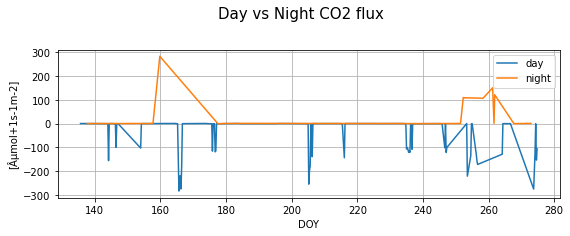

In [495]:
fig, ax = plt.subplots()
fig.suptitle('Day vs Night CO2 flux',size=15)

ax1 = plt.subplot(211)
dfF_co2_day.plot(kind='line',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[Âµmol+1s-1m-2]',legend=False)
dfF_co2_night.plot(kind='line',x='DOY',y='co2_flux',ax=ax1,
             figsize=(9,6),grid=True,#xlim=(0,35),
             ylabel='[Âµmol+1s-1m-2]',legend=False)

#Create a customizable legend
day = mlines.Line2D([], [], color='tab:blue', markersize=3, label='day')
night = mlines.Line2D([], [], color='tab:orange', markersize=3, label='night')
ax1.legend(handles=[day, night]);

In [446]:
stats_day = pd.DataFrame(dfF_co2_day['co2_flux'].describe()).rename(columns={"co2_flux": "day"})
stats_lake
stats_night = pd.DataFrame(dfF_co2_night['co2_flux'].describe()).rename(columns={"co2_flux": "night"})
statistics = pd.concat([stats_day, stats_night],axis=1)
statistics

,day,night
count,173.000000,141.000000
mean,-32.410621,7.008658
std,67.509016,33.551508
min,-284.866000,-0.830838
25%,-0.939626,-0.139508
50%,-0.633335,0.062163
75%,-0.204556,0.183671
max,0.527738,283.627000


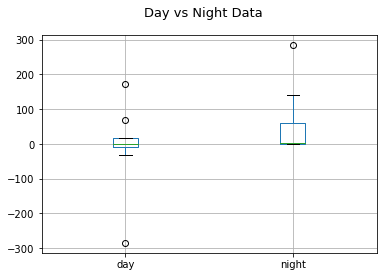

In [447]:
fig, ax = plt.subplots()
fig.suptitle('Day vs Night Data',size=13)
boxplot = statistics.boxplot(column=['day','night'],ax=ax,fontsize=10, 
                             rot=0, grid=True, figsize=None,layout=None)